### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: 'China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel

In [1]:
from covid_top import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
No Information about the population of country  Ivory Coast
No Information about the population of country  Hong Kong
No Information about the population of country  Saint Barthelemy
No Information about the population of country  East Timor
No Information about the population of country  Palestine
No Information about the popula

/isibhv/projects/p_aicore/lphan/CodeRepo/Github/ML-Practices/18_Covid-19/covid_top.py:75: RuntimeWarning: invalid value encountered in double_scalars
  y_dat_ratioRecConf[country] = np.round((countries_recovered[country].iloc[-1]/countries_confirmed[country].iloc[-1])*100, 4)


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(data)

417

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'03-13-2021'

In [4]:
print("Total recovered first day: ", totalrecovered_by_day[0])
print("Total recovered last day: ", totalrecovered_by_day[-1])

Total recovered first day:  30.0
Total recovered last day:  67650283.0


### New Recovered in the World changed by day

('Last day Increasing', 252600.0)

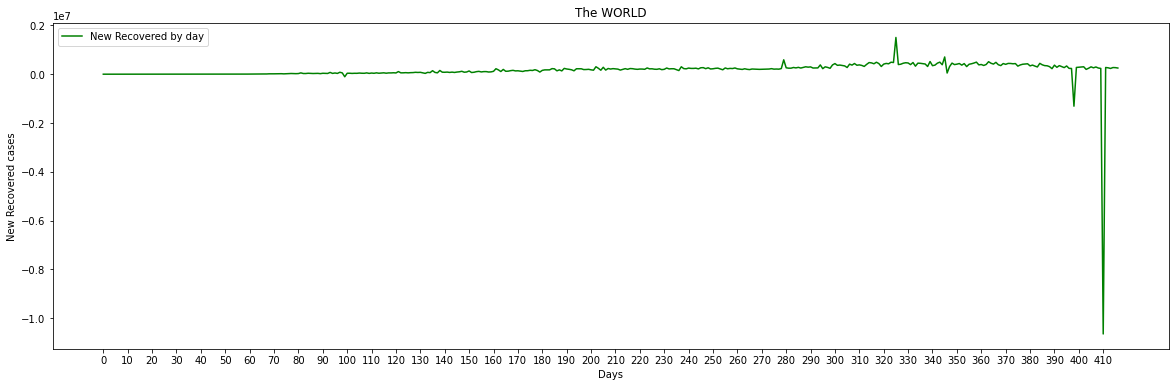

In [5]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, newRecoveredByDay, color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.title("The WORLD")
plt.legend(loc='upper left')

('Last day Increasing', totalrecovered_by_day[-1]-totalrecovered_by_day[-2])

##### NOTE: THERE IS DATA BIAS AT DAY 98

### Number of RECOVERED in the World from day 0 to latest day

Ratio recovered over Confirmed in last day (%):  56.604
Highest Ratio until now (%):  69.75


('Total Recovered until now: ', 67650283.0)

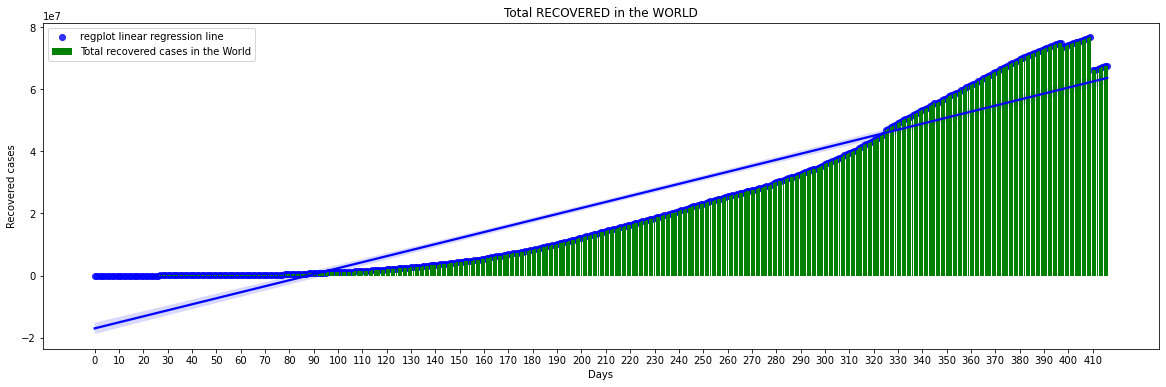

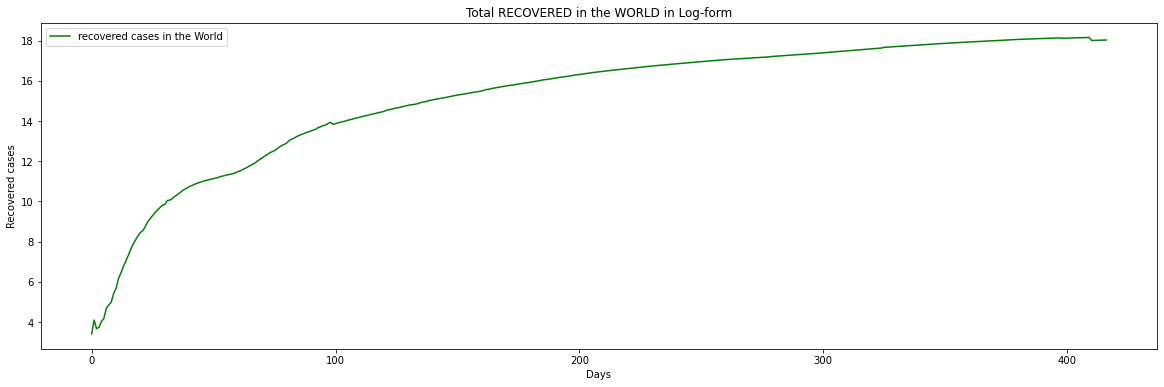

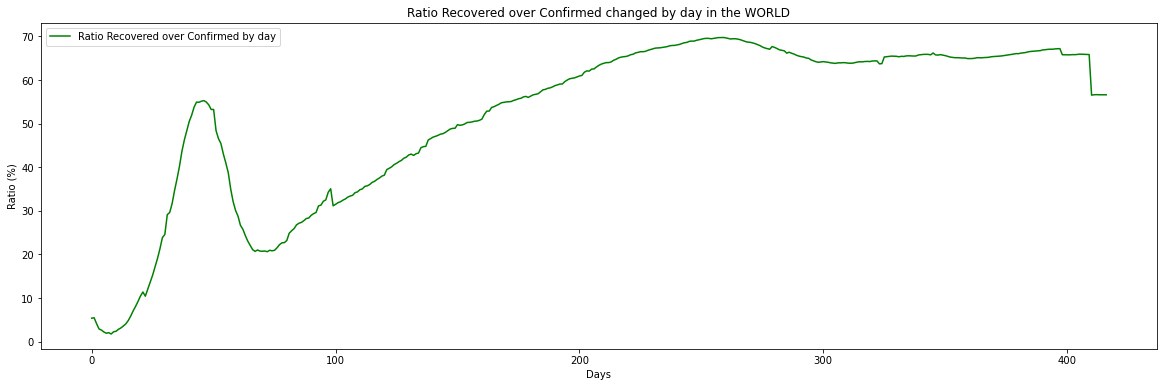

In [6]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, totalrecovered_by_day, color='green', label='Total recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
ax = sns.regplot(x=x_dat, y=totalrecovered_by_day, ci=95, label="regplot linear regression line", color="blue")
ax.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD")

plt.figure(2)
plt.plot(x_dat, np.log(totalrecovered_by_day), color='green', label='recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD in Log-form")

plt.figure(3)
plt.plot(x_dat, ratioRecByDay, color='green', label='Ratio Recovered over Confirmed by day')
plt.xlabel('Days')
plt.ylabel('Ratio (%)')
plt.title("Ratio Recovered over Confirmed changed by day in the WORLD")
plt.legend(loc='upper left')

print("Ratio recovered over Confirmed in last day (%): ", ratioRecByDay[-1])
print('Highest Ratio until now (%): ', np.max(ratioRecByDay))
('Total Recovered until now: ', totalrecovered_by_day[-1])

,China,Germany,Italy,"Korea, South",Japan,US,Australia,Luxembourg,United Kingdom,Canada,Vietnam,Israel
0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
412,95903.0,2331890.0,2521731.0,84312.0,420104.0,0.0,22936.0,53266.0,11868.0,846931.0,2004.0,764220.0
413,95923.0,2340473.0,2535483.0,84675.0,421265.0,0.0,22945.0,53453.0,11923.0,849784.0,2004.0,768713.0
414,95951.0,2349384.0,2550483.0,85743.0,422386.0,0.0,22949.0,53748.0,11944.0,852439.0,2048.0,773545.0
415,95972.0,2356590.0,2564926.0,86625.0,423463.0,0.0,22952.0,53941.0,11947.0,855849.0,2086.0,775675.0


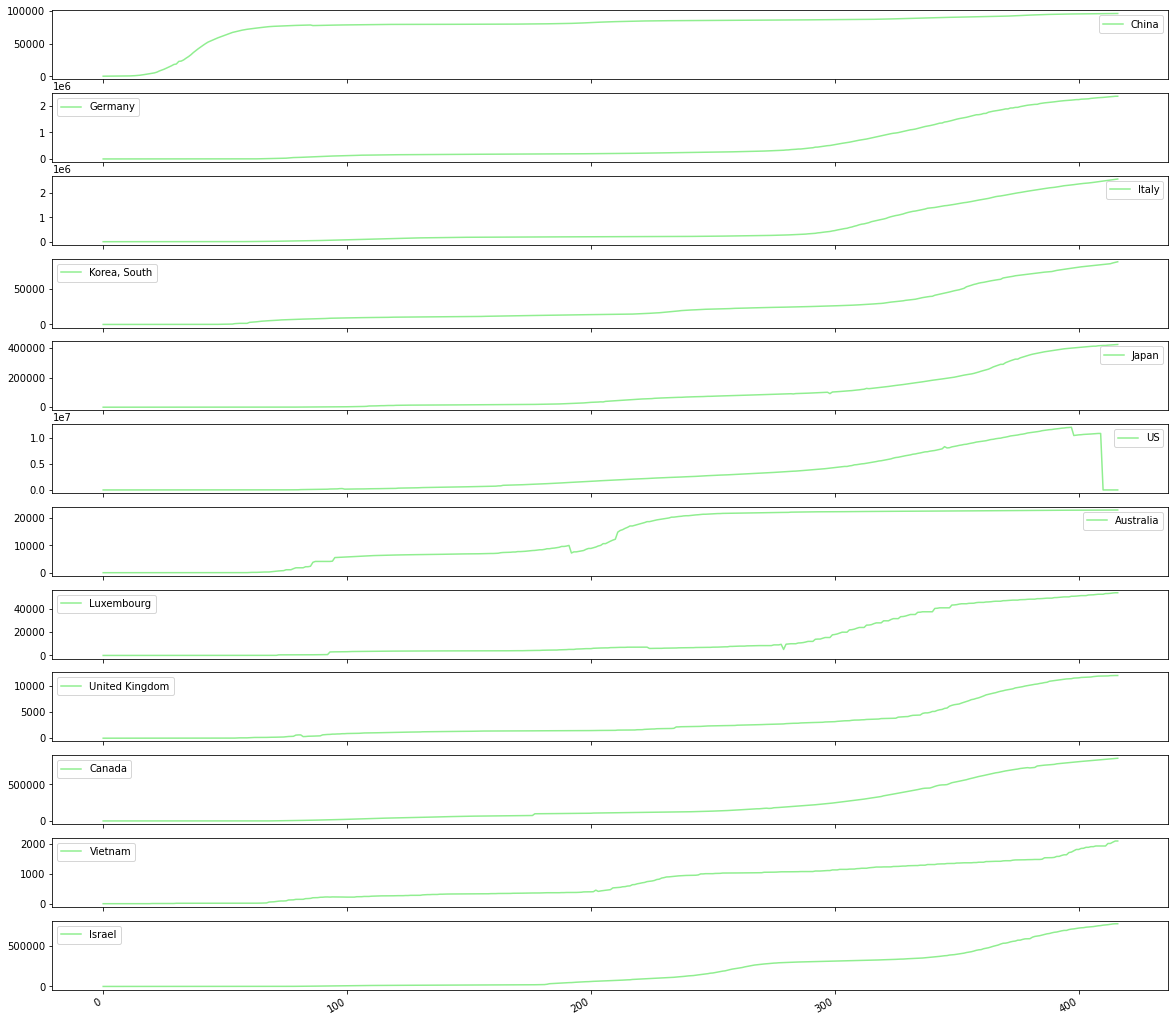

In [7]:
from pandas import Grouper
countries = ['China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel']
rcParams['figure.figsize'] = 20, 20
countries_recovered[countries].plot(subplots=True, legend=True, color='lightgreen')
countries_recovered[countries]

In [9]:
# countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Recovered', 'Highest Number'])

# for country in countries:
#     countriesdf[country] = [all_countries['Recovered'][country][-1]-all_countries['Recovered'][country][-2], all_countries['Recovered'][country][-1], np.max(list(list(zip(*y_dat_recovered_ByDay[country]))[1]))]

# figure = 1
# rcParams['figure.figsize'] = 20, 6

# for country in countries:    
#     plt.figure(figure)
#     plt.plot(*zip(*y_dat_recovered_ByDay[country]), color='lightgreen', label=country)
#     plt.scatter(*zip(*y_dat_recovered_ByDay[country]), color='green')
#     plt.title("Number of Recovered cases changed by day")
#     plt.legend(loc='upper left')
#     figure = figure+1

# countriesdf

#### There are bias data found when you see the scattered plot shows the negative values (<0).